# This notebook is dedicated to the Exploratory Data Analysis of the Research Project
### MSC/DSA/134

### Load Required Packages

In [40]:
# loading required packages
import pandas as pd
import numpy as np
from globals.pandas_functions import *
from globals.data_visualizations import *

## 1. Load Datasets

In [5]:
# load  (original) datasets
data_path = "data/"
train_identity = pd.read_csv(data_path + "train_identity.csv")
train_transaction = pd.read_csv(data_path + "train_transaction.csv")
test_identity = pd.read_csv(data_path + "test_identity.csv")
test_transaction = pd.read_csv(data_path + "test_transaction.csv")

## 2. Understanding the Data
### 2.1 Dataset Dimensions

In [6]:
# view each dataset dimension
dataset_dimension("Identity (train)", train_identity)
dataset_dimension("Transaction (train)", train_transaction)
dataset_dimension("Identity (test)", test_identity)
dataset_dimension("Transaction (test)", test_transaction)

Identity (train) dataset dimension: (144233, 41)
Transaction (train) dataset dimension: (590540, 394)
Identity (test) dataset dimension: (141907, 41)
Transaction (test) dataset dimension: (506691, 393)


## 2.2 First Few Records of Each Dataset

In [7]:
print("Train identity dataset:")
train_identity.head()


Train identity dataset:


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
print("Train transaction dataset:")
train_transaction.head()

Train transaction dataset:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
print("Test identity dataset:")
test_identity.head()

Test identity dataset:


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [9]:
print("Test transaction dataset:")
test_transaction.head()

Test transaction dataset:


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note:** By inspecting the first few records of each dataset, we can observe that the identity datasets contain various identity-related features, while the transaction datasets include transaction-specific details along with the target variable isFraud in the training set. Neither test dataset will play an important role in the model-building and validation stage, since the test_transaction dataset did not contain the target variable of isFraud.
Since there are two segments of data available as identity and transaction, better to merge them together to do further analysis on the data.
Below defines the merged dataframes. **transaction_data** contains the both _train_identity_ and _train_transaction_ data joined by **TransactionID**.
Similarly, _test_identity_ and _test_transaction_ datasets are merged by **TransactionID** as **unseen_transaction_data**.

In [10]:
# merging train datasets
transaction_data = pd.merge(train_identity, train_transaction, on="TransactionID", how="right") # right mapping is used to retain all transaction records
dataset_dimension("Merged Train Transaction Data", transaction_data)

Merged Train Transaction Data dataset dimension: (590540, 434)


In [11]:
transaction_data.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# merging test datasets
unseen_transaction_data = pd.merge(test_identity, test_transaction, on="TransactionID", how="inner")
dataset_dimension("Merged Test Transaction Data", unseen_transaction_data)

Merged Test Transaction Data dataset dimension: (141907, 433)


In [13]:
# merging train datasets (INNER)
transaction_data_inner = pd.merge(train_identity, train_transaction, on="TransactionID", how="inner")
dataset_dimension("Merged Train Transaction Data", transaction_data_inner)

Merged Train Transaction Data dataset dimension: (144233, 434)


In [14]:
# removing transactionId column from merged dataframes
transaction_data = transaction_data.drop(columns=["TransactionID"])

In [15]:
# define target variable
target_variable = "isFraud"

### 2.3 Null Value Analysis


Transaction dataset null value analysis:


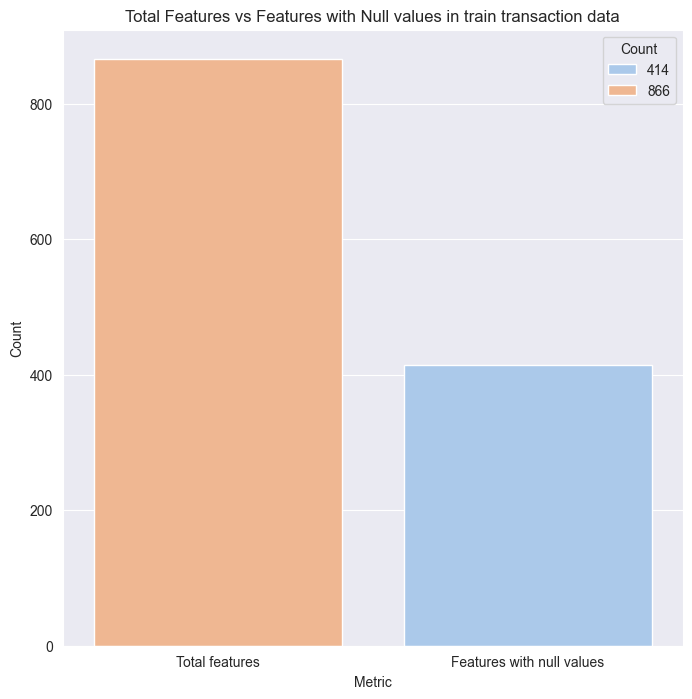

In [16]:
print("Transaction dataset null value analysis:")

transaction_data_nulls = get_null_count_df(transaction_data)

# get summary of null values
transaction_data_null_summary = pd.DataFrame({
    "Metric": ["Total features", "Features with null values"],
    "Count": [transaction_data_nulls.size, (transaction_data_nulls["count"] > 0).sum()]
})

# display summary of null values
show_bar_plot(transaction_data_null_summary , "Metric", "Count", "Total Features vs Features with Null values in train transaction data", "Count", (8, 8))


**Transaction data: features with missing values exceeding 80%**

In [17]:
# train transaction null values by percentage
null_summary_by_percentage_80 = get_null_values_by_threshold_range(transaction_data, 80, 100)
print(null_summary_by_percentage_80)
print("Number of features: ",len(null_summary_by_percentage_80))

    feature   count  missing_percentage
2     id_03  524216           88.768923
3     id_04  524216           88.768923
6     id_07  585385           99.127070
7     id_08  585385           99.127070
8     id_09  515614           87.312290
..      ...     ...                 ...
428    V335  508189           86.054967
429    V336  508189           86.054967
430    V337  508189           86.054967
431    V338  508189           86.054967
432    V339  508189           86.054967

[74 rows x 3 columns]
Number of features:  74


**Note:** Here, we can observe that there are 74 features in the training transaction dataset that have a high percentage of missing values (over 80%). **Better to drop** these features since most of them are null

**Training transaction data: features with missing values between 50% and 80%**

In [18]:
null_summary_by_percentage_50_80 = get_null_values_by_threshold_range(transaction_data, 50, 80)

print(null_summary_by_percentage_50_80)
print("Number of features: ",len(null_summary_by_percentage_50_80))

    feature   count  missing_percentage
0     id_01  446307           75.576083
1     id_02  449668           76.145223
4     id_05  453675           76.823755
5     id_06  453675           76.823755
10    id_11  449562           76.127273
..      ...     ...                 ...
367    V274  460110           77.913435
368    V275  460110           77.913435
369    V276  460110           77.913435
370    V277  460110           77.913435
371    V278  460110           77.913435

[140 rows x 3 columns]
Number of features:  140


**Note:** There **are 140 features** where 50% of their values are missing. **Better to drop** these features as well.

**Training transaction data: features with missing values less than 50%**

In [46]:
null_summary_by_percentage_below_50 = get_null_values_by_threshold_range(transaction_data, 0, 50)
print(null_summary_by_percentage_below_50)
print("Number of features: ",len(null_summary_by_percentage_below_50))

    feature  count  missing_percentage
45    card2   8933            1.512683
46    card3   1565            0.265012
47    card4   1577            0.267044
48    card5   4259            0.721204
49    card6   1571            0.266028
..      ...    ...                 ...
410    V317     12            0.002032
411    V318     12            0.002032
412    V319     12            0.002032
413    V320     12            0.002032
414    V321     12            0.002032

[200 rows x 3 columns]
Number of features:  200


**Note:** 283 features contain null values less than 50%. These values should be purified.

#### 2.3.1 Purifying Null Values
****Stage 1: Dropping features with more than 50% null values****

In [19]:
# dropping features with more than 50% null values
def drop_high_null_features(df: pd.DataFrame, threshold: float) -> pd.DataFrame:
    null_summary = get_null_value_summary(df)
    features_to_drop = null_summary[null_summary["missing_percentage"] > threshold]["feature"].tolist()
    purified_df = df.drop(columns=features_to_drop)
    return purified_df

In [20]:
transaction_data_cleaned_stage_1 = drop_high_null_features(transaction_data, 50)
dataset_dimension("Purified Stage 1 Train Transaction Data", transaction_data_cleaned_stage_1)

Purified Stage 1 Train Transaction Data dataset dimension: (590540, 219)


In [21]:
null_summary_by_percentage_50_80 = get_null_values_by_threshold_range(transaction_data_cleaned_stage_1, 50, 80)

print(null_summary_by_percentage_50_80)
print("Number of features: ",len(null_summary_by_percentage_50_80))

Empty DataFrame
Columns: [feature, count, missing_percentage]
Index: []
Number of features:  0


**Note:** Now, there are no features with missing values exceeding 50% in the purified training transaction dataset. **(stage 1)**

****Stage 2: Impute features with less than 50% null values - Categorical Features****

In [22]:
null_summary_by_percentage_below_50 = get_null_values_by_threshold_range(transaction_data_cleaned_stage_1, 0, 50)

print(null_summary_by_percentage_below_50)
print("Number of features: ",len(null_summary_by_percentage_50_80))

    feature  count  missing_percentage
5     card2   8933            1.512683
6     card3   1565            0.265012
7     card4   1577            0.267044
8     card5   4259            0.721204
9     card6   1571            0.266028
..      ...    ...                 ...
214    V317     12            0.002032
215    V318     12            0.002032
216    V319     12            0.002032
217    V320     12            0.002032
218    V321     12            0.002032

[200 rows x 3 columns]
Number of features:  0


In [23]:
# derive categorical features
categorical_features = transaction_data_cleaned_stage_1.select_dtypes(include=["object"]).columns.tolist()
print(categorical_features)

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M6']


In [25]:
# impute their null values (if nulls exist) using mode value
def impute_categorical_features(df: pd.DataFrame, categorical_features_list: list) -> pd.DataFrame:

    df_imputed = df.copy()

    for feature in categorical_features_list:
        if df_imputed[feature].isnull().sum() > 0:
            mode_value = df_imputed[feature].mode()[0]
            print(f"Feature: {feature} - Mode value: {mode_value}")
            df_imputed[feature] = df_imputed[feature].fillna(mode_value)

    return df_imputed

In [26]:
transaction_data_cleaned_stage_2 = impute_categorical_features(transaction_data_cleaned_stage_1, categorical_features)
dataset_dimension("Purified Stage 2 Train Transaction Data", transaction_data_cleaned_stage_2)

Feature: card4 - Mode value: visa
Feature: card6 - Mode value: debit
Feature: P_emaildomain - Mode value: gmail.com
Feature: M1 - Mode value: T
Feature: M2 - Mode value: T
Feature: M3 - Mode value: T
Feature: M4 - Mode value: M0
Feature: M6 - Mode value: F
Purified Stage 2 Train Transaction Data dataset dimension: (590540, 219)


In [27]:
null_summary_by_percentage_below_50 = get_null_values_by_threshold_range(transaction_data_cleaned_stage_2, 0, 50)

print(null_summary_by_percentage_below_50)
print("Number of features: ",len(null_summary_by_percentage_50_80))

    feature  count  missing_percentage
5     card2   8933            1.512683
6     card3   1565            0.265012
8     card5   4259            0.721204
10    addr1  65706           11.126427
11    addr2  65706           11.126427
..      ...    ...                 ...
214    V317     12            0.002032
215    V318     12            0.002032
216    V319     12            0.002032
217    V320     12            0.002032
218    V321     12            0.002032

[192 rows x 3 columns]
Number of features:  0


**Note:** At the end of **stage 2** of null value purification, 8 categorical features had their null values imputed using the mode value of each feature.

****Stage 3: Impute features with less than 50% null values - Numerical Features****

In [28]:
# numerical features
numerical_features = transaction_data_cleaned_stage_2.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_features)
print()
print(f"Number of numerical features: {len(numerical_features)}")
print(f"Number of categorical features: {len(categorical_features)}")
print(f"Total features: {len(transaction_data_cleaned_stage_2.columns.tolist())}")

# skip target variable from numerical features

# TODO: test each feature for nulls
# TODO: test each feature for normality, better to use shapiro-wilk test

['isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D10', 'D11', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', '

### Note:
This null value imputation for numerical is slit in to 2 stages.
1. In this stage, remove all numerical column that have null values and get new output dataframe.
2. In the next stage, impute the remaining numerical features with null values using suitable techniques.

Idea here is to proceed forward with next steps of the research.

In [30]:
def is_contains(item, lst: list) -> bool:
    return item in lst

def prune_numerical_features_with_nulls(df: pd.DataFrame, numerical_features_list: list, features_to_skip:list) -> pd.DataFrame:
    df_pruned = df.copy()

    for feature in numerical_features_list:
        if df_pruned[feature].isnull().sum() > 0 and not is_contains(feature, features_to_skip):
            print(f"Dropping numerical feature with nulls: {feature}")
            df_pruned = df_pruned.drop(columns=[feature])

    return df_pruned

In [31]:
transaction_data_without_nulls = prune_numerical_features_with_nulls(transaction_data_cleaned_stage_2, numerical_features, [target_variable])
dataset_dimension("Purified Stage  Train Transaction Data", transaction_data_without_nulls)

Dropping numerical feature with nulls: card2
Dropping numerical feature with nulls: card3
Dropping numerical feature with nulls: card5
Dropping numerical feature with nulls: addr1
Dropping numerical feature with nulls: addr2
Dropping numerical feature with nulls: D1
Dropping numerical feature with nulls: D2
Dropping numerical feature with nulls: D3
Dropping numerical feature with nulls: D4
Dropping numerical feature with nulls: D10
Dropping numerical feature with nulls: D11
Dropping numerical feature with nulls: D15
Dropping numerical feature with nulls: V1
Dropping numerical feature with nulls: V2
Dropping numerical feature with nulls: V3
Dropping numerical feature with nulls: V4
Dropping numerical feature with nulls: V5
Dropping numerical feature with nulls: V6
Dropping numerical feature with nulls: V7
Dropping numerical feature with nulls: V8
Dropping numerical feature with nulls: V9
Dropping numerical feature with nulls: V10
Dropping numerical feature with nulls: V11
Dropping numer

In [32]:
# check remaining null values
print(get_null_values_by_threshold_range(transaction_data_without_nulls, 0, 50))

Empty DataFrame
Columns: [feature, count, missing_percentage]
Index: []


### 2.4 Duplicate Records Analysis


In [33]:
print(f"Number of duplicate records in training transaction data: {transaction_data_without_nulls.duplicated().sum()}")

Number of duplicate records in training transaction data: 31


In [35]:
# function to drop duplicate records
def drop_duplicate_records(df: pd.DataFrame) -> pd.DataFrame:
    df_deduplicated = df.drop_duplicates()
    return df_deduplicated

In [37]:
final_unified_dataset = drop_duplicate_records(transaction_data_without_nulls)
print(f"Number of duplicate records in final unified data: {final_unified_dataset.duplicated().sum()}")
dataset_dimension("Final Unified Data", final_unified_dataset)

Number of duplicate records in final unified data: 0
Final Unified Data dataset dimension: (590509, 27)


In [41]:
# export final unified dataset to csv
export_dataframe_to_csv(final_unified_dataset, "data/processed/", "unified_transaction_data_option1.csv")

DataFrame successfully exported to: data/processed/unified_transaction_data_option1.csv


'data/processed/unified_transaction_data_option1.csv'

### 2.5 Univariate Analysis

In [34]:
# TransactionAmt
print("Transaction data - TransactionAmt description:")
transaction_data["TransactionAmt"].describe()


Transaction data - TransactionAmt description:


count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [35]:
train_transaction["TransactionAmt"].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

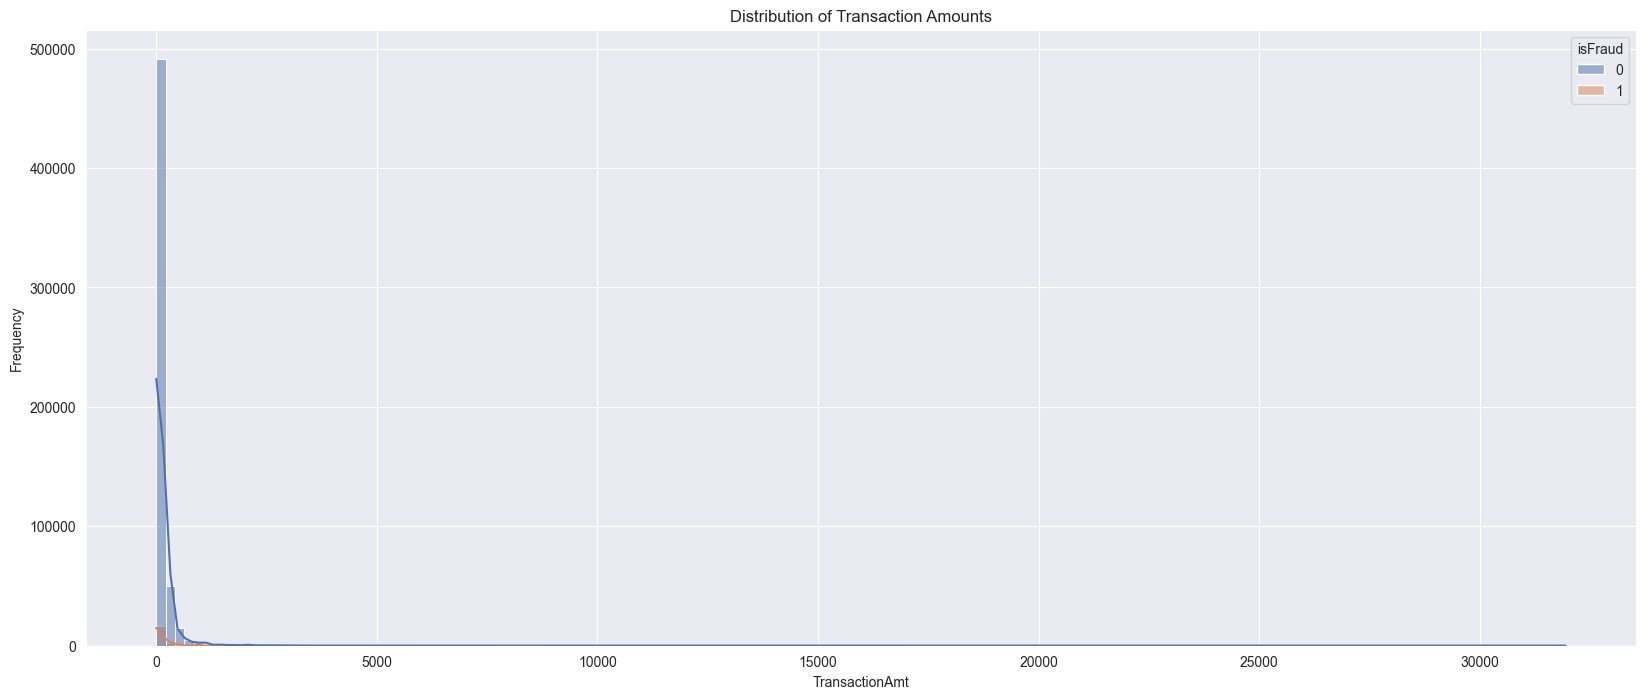

In [36]:
show_histogram(train_transaction, "TransactionAmt", "Distribution of Transaction Amounts", bins=150, hue="isFraud", color_palette="deep", figure_size=(20, 8))

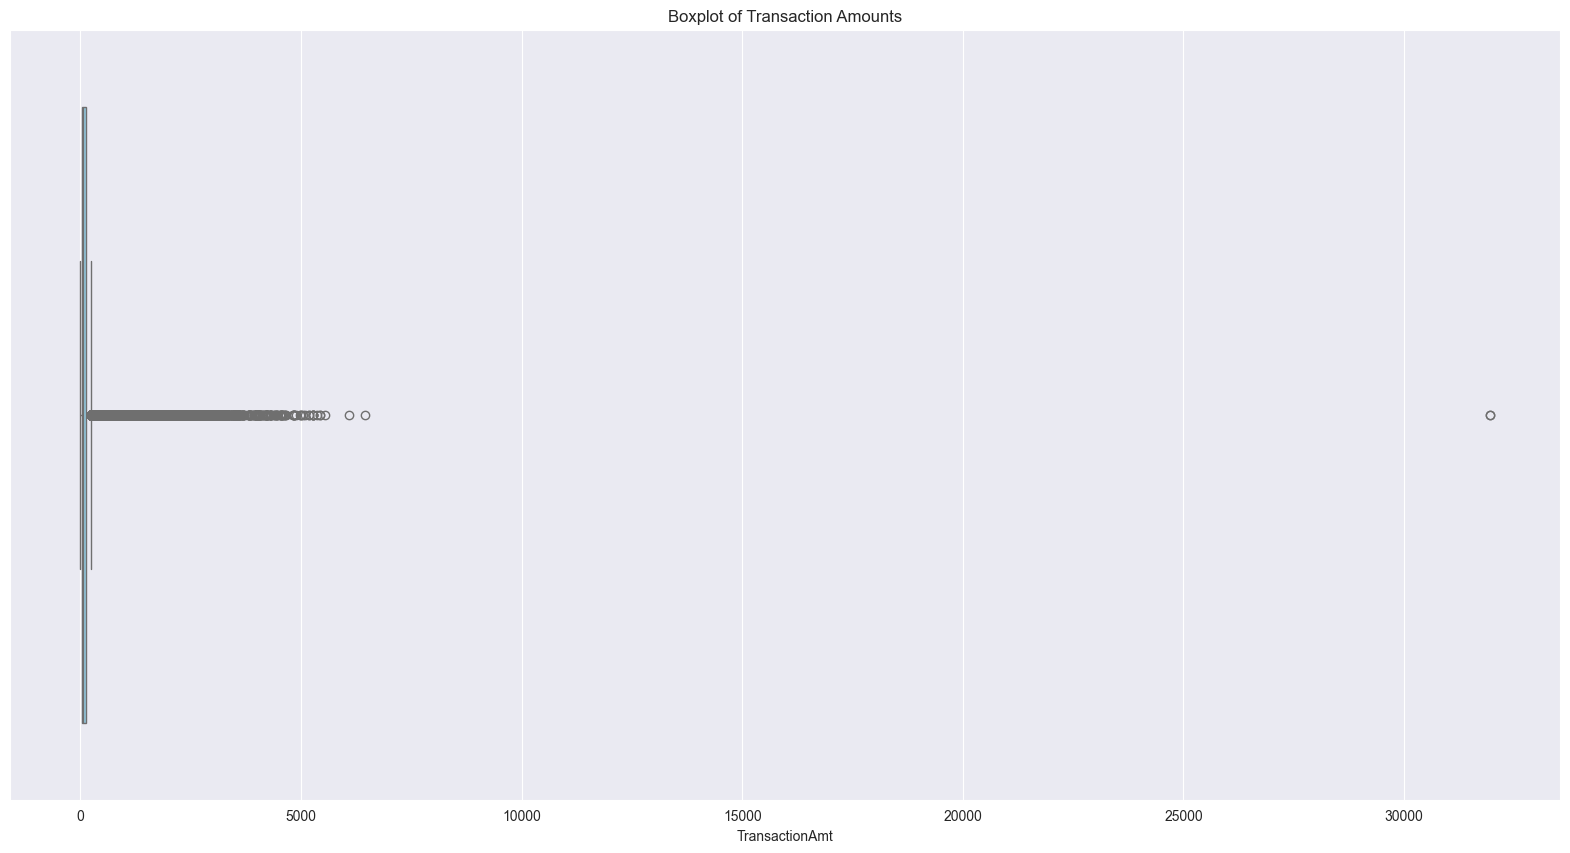

In [40]:
# outliers
show_boxplot(transaction_data, "TransactionAmt", "Boxplot of Transaction Amounts", figure_size=(20, 10), horizontal=True)